## Sprawozdanie4

**Data:** 2024-05-28
**Autor:** Piotr Szepietowski

## Wykorzystywane dalej biblioteki zewnętrzne Pythona

    - Numpy
    - matplotlib

## Implementacja metod numerycznego rozwiązywania równań różniczkowych

    - Metoda Eulera - najprostsza metoda do numerycznego rozwiązywania równań różniczkowych, polegająca na liniowym przybliżeniu funkcji rozwiązania.

    -Metoda zmodyfikowana Eulera - ulepszona wersja metody Eulera, która polega na wprowadzeniu dodatkowego kroku korygującego, co zwiększa dokładność rozwiązania.

    - Metoda Heun’a - znana również jako metoda trapezów, która jest formą metody predyktor-korektor, wykorzystująca średnią wartość nachylenia w dwóch punktach.

    - Metoda Rungego-Kutty - bardziej zaawansowana metoda, która pozwala na uzyskanie lepszej dokładności dzięki wykorzystaniu kilku ocen nachylenia funkcji w jednym kroku iteracyjnym.

In [ ]:
f = lambda x, y: x + y

def euler(x, y, h, target):
    while x < target:
        y += h * f(x, y)
        x += h
    return (x, y)

def modifiedEuler(x, y, h, target):
    while x < target:
        k1 = f(x, y)
        k2 = f(x + h, y + h * k1)
        y += h * 0.5 * (k1 + k2)
        x += h
    return (x, y)

def heun(x, y, h, target):
    while x < target:
        k1 = f(x, y)
        k2 = f(x + h, y + h * k1)
        y += h * 0.5 * (k1 + k2)
        x += h
    return (x, y)

def rungyKatt(x, y, h, target):
    while x < target:
        k1 = f(x, y)
        k2 = f(x + 0.5 * h, y + 0.5 * h * k1)
        k3 = f(x + 0.5 * h, y + 0.5 * h * k2)
        k4 = f(x + h, y + h * k3)
        y += h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        x += h
    return (x, y)

print(euler(0, 1, 0.1, 0.1))
print(modifiedEuler(0, 1, 0.1, 0.1))
print(heun(0,1,0.1, 0.1))
print(rungyKatt(0,1,0.1, 0.1))

(0.1, 1.1)
(0.1, 1.11)
(0.1, 1.11)
(0.1, 1.1103416666666666)


## Warunki początkowe i zakres obliczeń
Celem projektu jest wyznaczenie i analiza maksymalnego błędu numerycznego dla różnych metod rozwiązywania równania różniczkowego określonego wzorem:
$$y' = f(x, y) = \frac{4x}{(1 + x^2)^{1/3}}$$
Porównanie będzie wykonane w odniesieniu do rozwiązania analitycznego wyrażonego przez funkcję: $g(t) = 3(1 + x^2)^{2/3} - 2.772$

   - Rozwiązania powinny być obliczone na przedziale $[-2, 2]$.
   - Warunek początkowy to $y(-2) = 6$.
   - Kroki integracji: $h = 0.5, 0.1, 0.01$.

3. **Analiza i porównanie błędów**:
   - Porównanie maksymalnych błędów numerycznych dla każdej metody w stosunku do rozwiązania analitycznego.
   - Wyniki należy przedstawić graficznie (5 przebiegów na jednym wykresie) oraz tabelarycznie.

c) **Analiza**:
   - Omówienie wyników, interpretacja błędów i ich zależności od wielkości kroku oraz typu metody.
   - Zalecenia, która metoda jest najbardziej efektywna w kontekście badanego równania.

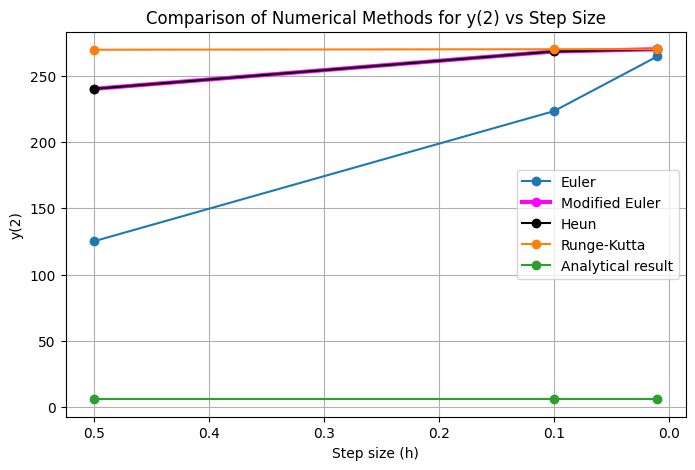

In [25]:
import pandas as pd

hArr = [0.5, 0.1, 0.01]
analitic = lambda x: 3 * (1 + x ** 2) ** (2/3) - 2.722
x0, y0, x1 = -2, 6, 2
results = {"euler": [], "modified": [], "katt": [], "heun": [], "analytic": []}
for h in hArr:
    results["euler"].append(euler(x0, y0, h, x1)[1])
    results["modified"].append(modifiedEuler(x0, y0, h, x1)[1])
    results["heun"].append(heun(x0, y0, h, x1)[1])
    results["katt"].append(rungyKatt(x0, y0, h, x1)[1])
    results["analytic"].append(analitic(x1))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(hArr, results["euler"], marker='o', label='Euler')
plt.plot(hArr, results["modified"], marker='o', label='Modified Euler', linewidth=3, color='magenta')
plt.plot(hArr, results["heun"], marker='o', label="Heun", color="black")
plt.plot(hArr, results["katt"], marker='o', label="Runge-Kutta")
plt.plot(hArr, results["analytic"], marker='o', label="Analytical result")

plt.xlabel('Step size (h)')
plt.ylabel('y(2)')
plt.title('Comparison of Numerical Methods for y(2) vs Step Size')
plt.legend()
plt.gca().invert_xaxis()  # Optional: to show decreasing h left-to-right
plt.grid(True)
plt.show()

In [26]:
df_results = pd.DataFrame({
    'h': hArr,
    'Euler': results['euler'],
    'Modified Euler': results['modified'],
    'Heun': results['heun'],
    'Runge-Kutta': results['katt'],
    'Analytical': results['analytic']
})
df_results

,h,Euler,Modified Euler,Heun,Runge-Kutta,Analytical
0,0.50,125.144531,240.106699,240.106699,269.615089,6.050053
1,0.10,223.296278,268.307079,268.307079,269.989913,6.050053
2,0.01,264.620586,269.972687,269.972687,269.990750,6.050053
